In [69]:
import os
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import pandas as pd
from library.Tempotron import Tempotron
from library.comput_utils import acc_metrics
from library.script_wrappers import find_nidx_along_traj, datagen_jitter
from library.utils import save_pickle, load_pickle
from library.visualization import plot_popras

In [70]:
# Plotting and path parameters
legendsize = 8
plt.rcParams.update({'font.size': legendsize,
                     "axes.titlesize": legendsize,
                     'axes.labelpad': 0,
                     'axes.titlepad': 0,
                     'xtick.major.pad': 0,
                     'ytick.major.pad': 0,
                     'lines.linewidth': 1,
                     'figure.figsize': (5.2, 5.5),
                     'figure.facecolor': 'white',
                     'figure.dpi': 300,
                     'axes.spines.top': False,
                     'axes.spines.right': False,

                     })

project_tag = 'TrainNoJit_Jit200_5ms'
# project_tag = 'Jit200_3ms'
simdata_dir = 'sim_results/fig6_TrainStand_ExInRun_Icompen2'
# simdata_dir = 'sim_results/fig6_TrainStand_Icompen2'
data_dir = join(simdata_dir, project_tag)
plot_dir = 'plots/fig6'
os.makedirs(plot_dir, exist_ok=True)

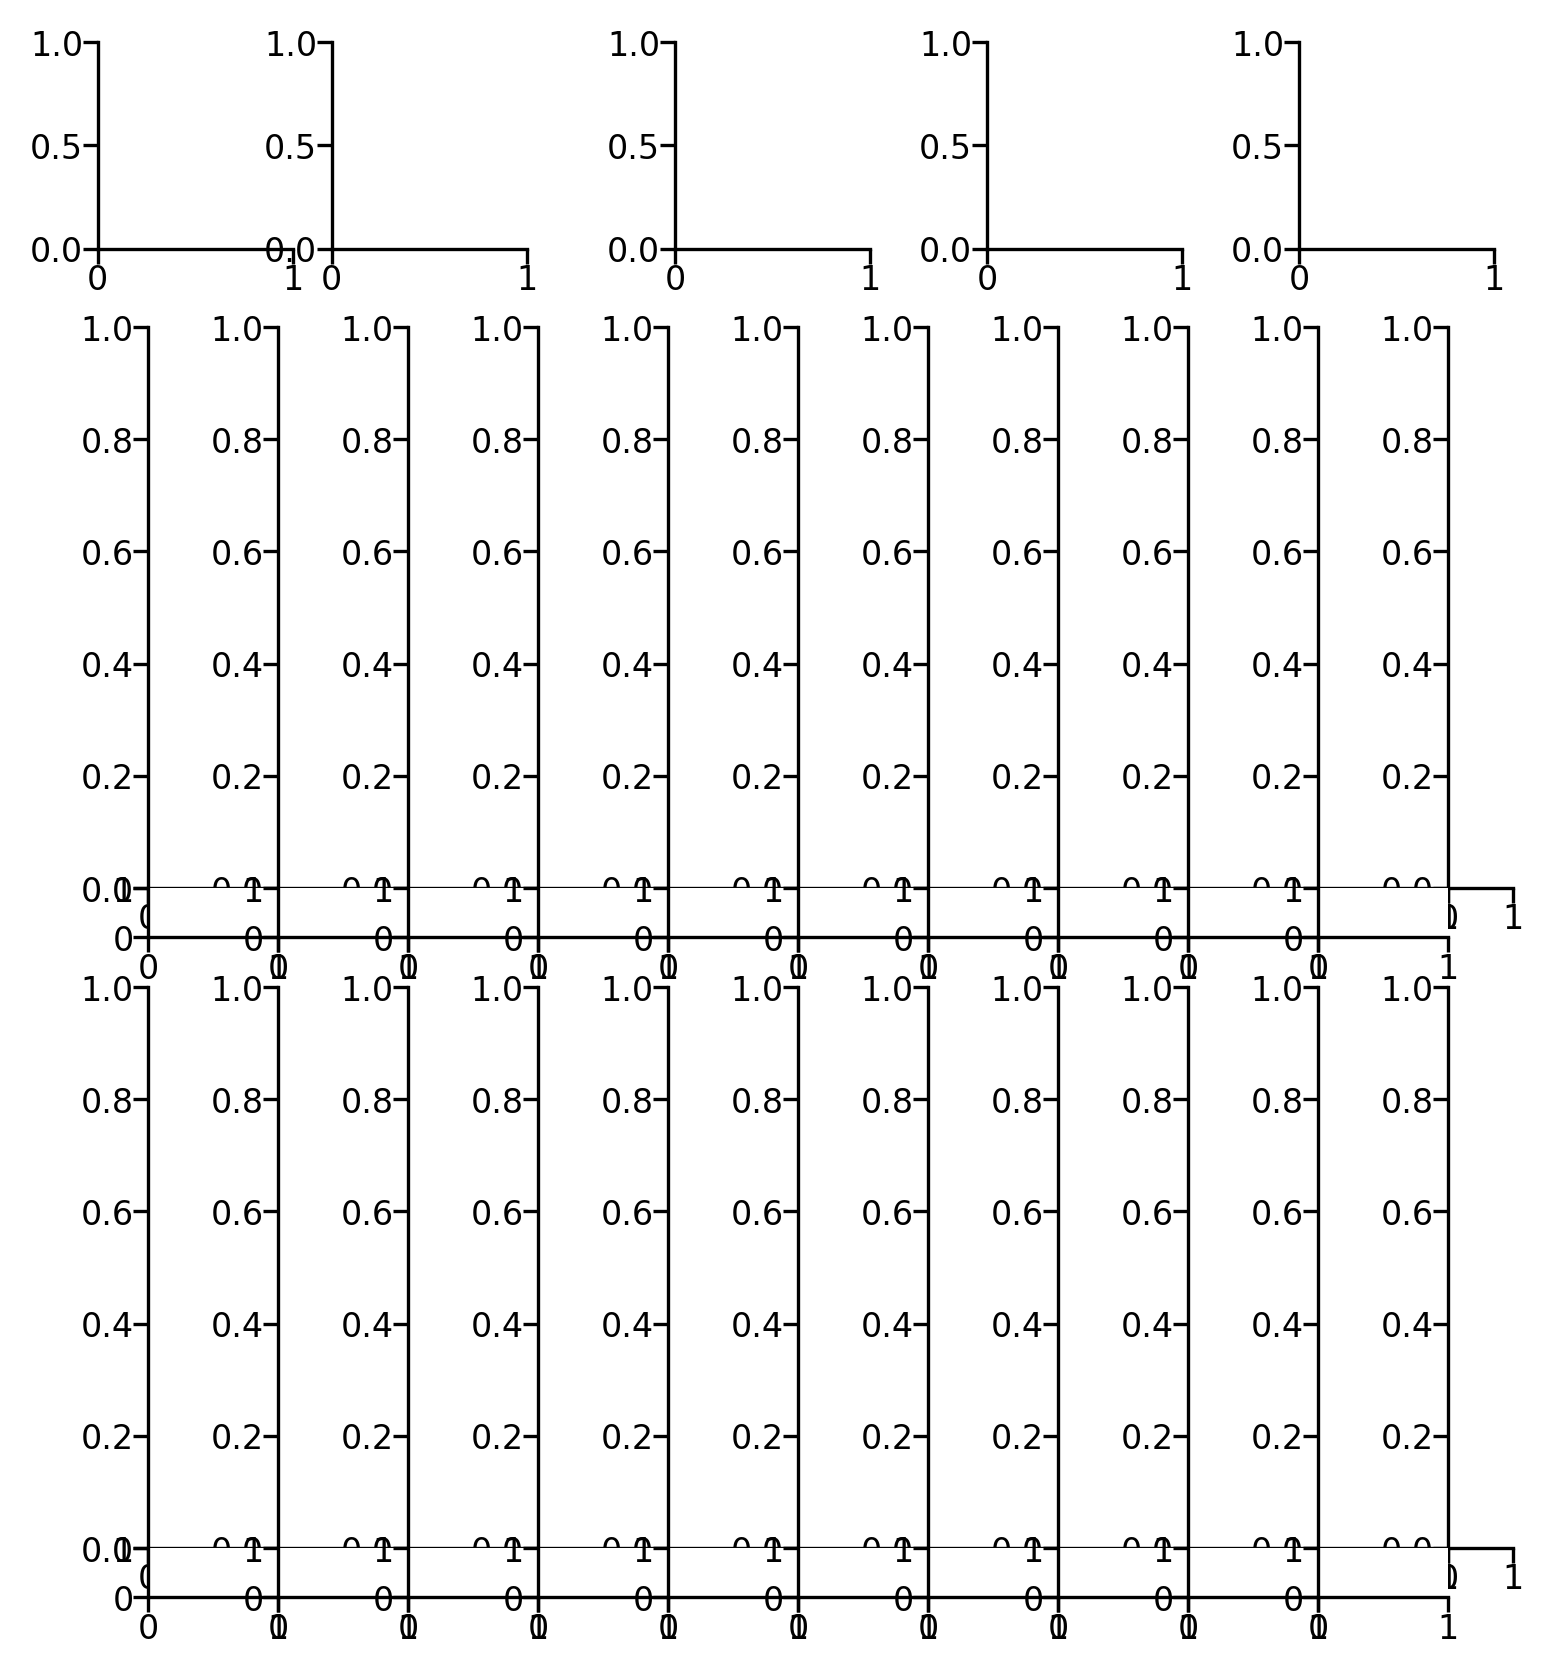

In [71]:
# Top small panels
ax_h1 = 1/5
ax_w1 = 1/5
hgap1 = 0.075
wgap1 = 0.075
train_xshift = 0.030
test_xshift = -0.020

# Raster plots
ax_h2 = 2/5
ax_w2 = 1/12  # 0.5/10.5 for 1d weights
hgap2 = 0.02
wgap2 = 0
ras_x_shift = 0.1

# Child plots in the raster plots
trace_h = ax_h2 / 10
w1d_w = 0.5/12

fig = plt.figure()
ax_trainScheme = fig.add_axes([ax_w1 * 0 + wgap1/2 + train_xshift, 1 - ax_h1 * 1 + hgap1/2, ax_w1 - wgap1, ax_h1 - hgap1])
ax_testScheme = fig.add_axes([ax_w1 * 1 + wgap1/2 + test_xshift, 1 - ax_h1 * 1 + hgap1/2, ax_w1 - wgap1, ax_h1 - hgap1])
ax_acc = fig.add_axes([ax_w1 * 2 + wgap1/2, 1 - ax_h1 * 1 + hgap1/2, ax_w1 - wgap1, ax_h1 - hgap1])
ax_exW2D = fig.add_axes([ax_w1 * 3 + wgap1/2, 1 - ax_h1 * 1 + hgap1/2, ax_w1 - wgap1, ax_h1 - hgap1])
ax_inW2D = fig.add_axes([ax_w1 * 4 + wgap1/2, 1 - ax_h1 * 1 + hgap1/2, ax_w1 - wgap1, ax_h1 - hgap1])

ax_inRas180 = [fig.add_axes([ax_w2 * i + ras_x_shift, 1 - ax_h1 - ax_h2 * 1 + trace_h + hgap2/2, ax_w2, ax_h2 - hgap2 - trace_h]) for i in range(10)]
ax_exRas180 = [fig.add_axes([ax_w2 * i + ras_x_shift, 1 - ax_h1 - ax_h2 * 2 + trace_h + hgap2/2, ax_w2, ax_h2 - hgap2 - trace_h]) for i in range(10)]

ax_inRasW1d = fig.add_axes([ax_w2 * 10 + ras_x_shift, 1 - ax_h1 - ax_h2 * 1 + trace_h + hgap2/2, w1d_w, ax_h2 - hgap2 - trace_h])
ax_exRasW1d = fig.add_axes([ax_w2 * 10 + ras_x_shift, 1 - ax_h1 - ax_h2 * 2 + trace_h + hgap2/2, w1d_w, ax_h2 - hgap2 - trace_h])

ax_inRasTrace = [fig.add_axes([ax_w2 * i + ras_x_shift, 1 - ax_h1 - ax_h2 * 1 + hgap2, ax_w2, trace_h - hgap2/2]) for i in range(10)]
ax_exRasTrace = [fig.add_axes([ax_w2 * i + ras_x_shift, 1 - ax_h1 - ax_h2 * 2 + hgap2, ax_w2, trace_h - hgap2/2]) for i in range(10)]

ax_exinW2D = [ax_exW2D, ax_inW2D]
ax_exinRas = [ax_exRas180, ax_inRas180]
ax_exinRasTrace = [ax_exRasTrace, ax_inRasTrace]
ax_exinRasW1d = [ax_exRasW1d, ax_inRasW1d]



In [72]:
def plot_tempotron_traces(axRas, axTrace, axW1d, N, X, Y, Y_pred, temNw, all_nidx, yytun1d, kout_all, tspout_all, val2cmap, traj_deg, exintag):

    M = len(axRas)
    w_yax = np.arange(N)
    y_nidx = yytun1d[all_nidx[w_yax]]

    if exintag == 'in':

        ylim = (np.max(np.where(y_nidx <14.7)[0]), np.min(np.where(y_nidx > 25.8)[0]))
    else:
        ylim = (np.max(np.where(y_nidx <-24.8)[0]), np.min(np.where(y_nidx > -14.7)[0]))

    for Mi in range(M):

        ysep_NiList = []
        for Ni in range(N):
            tsp = X[Mi, Ni]
            axRas[Mi].eventplot(tsp, lineoffsets=Ni, linelengths=1, linewidths=1, color=val2cmap.to_rgba(temNw[Ni]))

            if (Ni % 20 ) == 0:
                axRas[Mi].axhline(Ni+0.5, linewidth=0.5, color='gray')
                ysep_NiList.append(Ni)

        ysep_ax = np.array(ysep_NiList) + 0.5
        axRas[Mi].set_xlim(0, 100)
        axRas[Mi].set_xticks([])
        axRas[Mi].set_yticks(ysep_ax)
        axRas[Mi].set_yticklabels(np.around(yytun1d[all_nidx[ysep_NiList]], 0).astype(int).astype(str))
        # axRas[Mi].set_ylim(w_yax.min()-1, w_yax.max()+1)
        axRas[Mi].set_ylim(ylim[0], ylim[1])
        # axRas[Mi].set_title('Train#%d, %d deg, Label: %s, Pred: %s'% (Mi+1, traj_deg, Y[Mi], Y_pred[Mi]))
        if Y[Mi]:
            axRas[Mi].set_facecolor('0.95')
        if Mi > 0:
            axRas[Mi].set_yticks([])

        # Plot voltage trace
        axTrace[Mi].plot(temN_tax, kout_all[Mi], color='gray')
        axTrace[Mi].eventplot(tspout_all[Mi], lineoffsets=2.2, linelengths=0.2, color='r')
        axTrace[Mi].set_xlim(0, 100)
        axTrace[Mi].set_xticks([0, 100])
        axTrace[Mi].set_xticklabels([100*Mi, 100*(Mi+1)])
        axTrace[Mi].set_ylim(None, 3)
        axTrace[Mi].axhline(Vthresh, color='k', linewidth=0.1)

        if Mi > 0:
            axTrace[Mi].set_yticks([])

        # Plot flattened weights
        axW1d.barh(w_yax, temNw, color=val2cmap.to_rgba(temNw))
        axW1d.axvline(0, color='gray')
        axW1d.set_yticks(np.around(np.arange(N), 2))
        axW1d.axis('off')
        # axW1d.set_ylim(w_yax.min()-1, w_yax.max()+1)
        axW1d.set_ylim(ylim[0], ylim[1])


In [74]:
for exin_i, exintag in enumerate(['ex', 'in']):

    # # Load and organize data
    dataset = load_pickle(join(data_dir, 'data_train_test_ori_%s_%s.pickle'%(project_tag, exintag)))
    temNw =  np.load(join(data_dir, 'w_%s_%s.npy'%(project_tag, exintag)))
    simdata = load_pickle(join(simdata_dir, 'fig6_%s.pkl'%(exintag)))

    X_test_ori = dataset['X_test_ori']
    Y_test_ori = dataset['Y_test_ori']
    trajtype_test_ori = dataset['trajtype_test_ori']
    X_train_ori = dataset['X_train_ori']
    Y_train_ori = dataset['Y_train_ori']
    trajtype_train_ori = dataset['trajtype_train_ori']
    theta_bounds = dataset['theta_bounds']
    all_nidx = dataset['all_nidx']

    N = len(X_train_ori[0])
    num_trajtypes = trajtype_test_ori.max()+1
    trajtype_ax = np.arange(num_trajtypes)
    a_ax = trajtype_ax/num_trajtypes*2*np.pi
    deg_ax = np.around(np.rad2deg(a_ax), 0).astype(int)

    BehDF = simdata['BehDF']
    NeuronDF = simdata['NeuronDF']
    xxtun1d = NeuronDF['neuronx'].to_numpy()
    yytun1d = NeuronDF['neurony'].to_numpy()
    aatun1d = NeuronDF['neurona'].to_numpy()

    # # Set up tempotron and run predictions
    Vthresh = 2
    temN_tax = np.arange(0, 100, 1)
    temN = Tempotron(N=N, lr=0.01, Vthresh=Vthresh, tau=5, tau_s=5/4, w_seed=0)
    temN.w = temNw
    Y_train_ori_pred, kout_train_ori, tspout_train_ori = temN.predict(X_train_ori, temN_tax)
    Y_test_ori_pred, kout_test_ori, tspout_test_ori = temN.predict(X_test_ori, temN_tax)

    # # Plot training and testing trajectories
    for trajtype_this, BehDF_this in BehDF.groupby('traj_type'):
        traj_x, traj_y = BehDF_this['traj_x'].to_numpy(), BehDF_this['traj_y'].to_numpy()
        ax_plot = ax_trainScheme if trajtype_this == -1 else ax_testScheme
        ax_plot.plot(traj_x, traj_y, c='k', linewidth=0.1)
        ax_plot.arrow(traj_x[-1], traj_y[-1], traj_x[-1] - traj_x[-2], traj_y[-1] - traj_y[-2],
                      width=0.001, head_width=0.1, color='k', length_includes_head=True)


    # # Plot Weights
    wmin, wmax = temNw.min(), temNw.max()
    abswmax = max(np.abs(wmin), np.abs(wmax))
    norm = mpl.colors.Normalize(vmin=-abswmax, vmax=abswmax)
    val2cmap = cm.ScalarMappable(norm=norm, cmap=cm.jet)
    ax_exinW2D[exin_i].scatter(xxtun1d[all_nidx], yytun1d[all_nidx], c=temNw, cmap=cm.jet, vmin=-abswmax, vmax=abswmax, s=2)


    # Plot 180 deg test traces for ex & in
    traj_deg = 180
    chosen_trajtype = trajtype_ax[deg_ax==traj_deg].squeeze()
    mask = trajtype_test_ori == chosen_trajtype
    X_test_chosen = X_test_ori[mask]
    Y_test_chosen = Y_test_ori[mask]
    Y_test_ori_pred_chosen = Y_test_ori_pred[mask]
    kout_test_chosen = kout_test_ori[mask]
    tspout_test_chosen = tspout_test_ori[mask]

    plot_tempotron_traces(ax_exinRas[exin_i], ax_exinRasTrace[exin_i], ax_exinRasW1d[exin_i], N,
                          X=X_test_chosen, Y=Y_test_chosen, Y_pred=Y_test_ori_pred_chosen, temNw=temNw,
                          all_nidx=all_nidx, yytun1d=yytun1d, kout_all=kout_test_chosen, tspout_all=tspout_test_chosen,
                          val2cmap=val2cmap, traj_deg=traj_deg, exintag=exintag)

# # Plot training and testing trajectories outside the loop
for ax_each in [ax_trainScheme, ax_testScheme]:
    ax_each.plot((-10, 10, 10, -10, -10), (30, 30, 10, 10, 30), linewidth=0.1)   # In
    ax_each.plot((-10, 10, 10, -10, -10), (-10, -10, -30, -30, -10), linewidth=0.1)   # Ex
    ax_each.set_xlim(-40, 40)
    ax_each.set_ylim(-40, 40)
    ax_each.set_xticks(np.arange(-40, 41, 20))
    ax_each.set_xticklabels(['', '-20', '0', '20', ''])
    ax_each.set_xticks(np.arange(-40, 41, 10), minor=True)
    ax_each.set_yticks(np.arange(-40, 41, 20))
    ax_each.set_yticklabels(['', '-20', '0', '20', ''])
    ax_each.set_yticks(np.arange(-40, 41, 10), minor=True)



ax_testScheme.set_yticklabels([])

fig.savefig(join(plot_dir, 'fig6.png'), dpi=300)